## Week 6: Dimensionality Reduction

**(1a) Load the data file 'data1.csv' and visualize the data.**

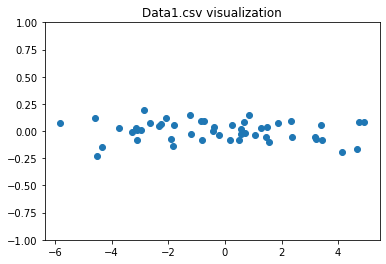

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading data1.csv
data1 = pd.read_csv("data1.csv",header= None)
# visualizing the data
plt.figure()
plt.scatter(data1.iloc[:,0],data1.iloc[:,1])
plt.ylim((-1,1))
plt.title("Data1.csv visualization")
plt.show()

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [7]:
# single feature representation
data1 = np.array(data1)
loss = np.zeros(2)
loss[0] = sum((data1[:,0])**2) # loss incurred if I remove feature 0
loss[1] = sum((data1[:,1])**2) # loss incurred if I remove feature 1
min_loss = min(loss)
print("minimum loss after eliminating one feature :",min_loss)
# single feature representation
y = data1[:,np.argmax(loss)]


minimum loss after eliminating one feature : 0.41912655244582403


**(1c) Visualize the approximated data and compare it with the original data.**

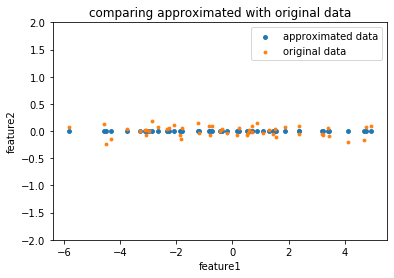

In [8]:
# visualization of approximated data
plt.figure()
plt.scatter(y,[0]*len(y), s = 15, label = "approximated data")
plt.scatter(data1[:,0],data1[:,1],s = 8, label = "original data")
plt.ylim((-2,2))
plt.legend()
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("comparing approximated with original data")
plt.show()

**(2a) Load the data file 'data2.csv'.**

In [9]:
# loading data2.csv
data2 = pd.read_csv("data2.csv",header= None)
data2.head()

,0,1,2,3
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913


**(2c) Plot the minimum representation loss as a function of the number of features used for representation.**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

loss when a feature is removed : [9.90713056e+02 3.91482648e+04 1.01338862e+06 5.10568517e+00]
decreasing order of importance of features : [3 2 1 4]


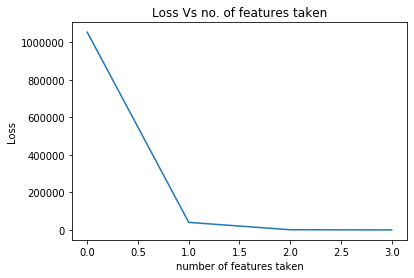

In [15]:
data2 = np.array(data2) 
var_arr = [sum(data2[:,i]**2) for i in range(data2.shape[1])]
var_arr = np.array(var_arr)
print("loss when a feature is removed :",var_arr)

# initializing loss
loss = [0]*(len(var_arr))
order = np.argsort(var_arr)[::-1]
print("decreasing order of importance of features :",order+1)
for i in range(data2.shape[1]):
    loss[i] = sum(var_arr[order[i:]])
# loss.reverse()

# plot
plt.figure()
plt.plot(np.arange(data2.shape[1]),loss)
plt.xlabel("number of features taken")
plt.ylabel("Loss")
plt.title("Loss Vs no. of features taken")
plt.show()
    

**(2d) Compute the covariance matrix of the $m$ features. Comment with respect to (2c).**

In [11]:
# computing covariance matrix
cov_mat = np.cov(data2,rowvar= False)
print("Covariance matrix :")
print(cov_mat)



Covariance matrix :
[[ 9.87196296e-01 -5.71788428e-02 -1.40990871e-01  3.05657061e-03]
 [-5.71788428e-02  3.91821903e+01  1.16676059e-01 -7.77027357e-03]
 [-1.40990871e-01  1.16676059e-01  1.00898980e+03  5.58349417e-02]
 [ 3.05657061e-03 -7.77027357e-03  5.58349417e-02  5.09299247e-03]]


## comments

- The loss obtained when a feature is removed is proportional to its variance.

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of the $m$ features.**

part - 3a


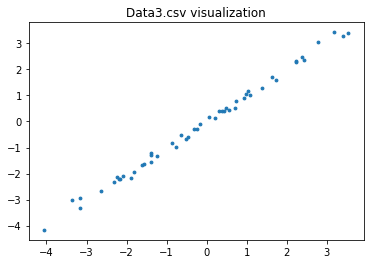


part - 3b

Covariance matrix ,C :
[[3.59416569 3.61756379]
 [3.61756379 3.65805865]]


In [16]:
# 3a 
print("part - 3a")
data3 = pd.read_csv("data3.csv", header = None)
# visualizing the data
plt.figure()
plt.scatter(data3.iloc[:,0],data3.iloc[:,1], s = 8)
# plt.ylim((-1,1))
plt.title("Data3.csv visualization")
plt.show()

# 3b
# computing covariance matrix
print()
print("part - 3b\n")
data3 = np.array(data3)
cov_mat = np.cov(data3,rowvar= False)
print("Covariance matrix ,C :")
print(cov_mat)


**(3c) Uncorrelate the covariance matrix $C$ using an orthonormal transformation (rotation).**

In [23]:
# uncorrelating the covariance matrix
eigvals, eigvecs = np.linalg.eig(cov_mat)
# eigvals
# uncorrelated rotation of covariance matrix
idx = eigvals.argsort()[::-1]
# arranging in descending order
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
uncorr_cov_mat = np.dot(np.dot(eigvecs.T,cov_mat),eigvecs)
print("The uncorrelated covariance matrix C :")
print(uncorr_cov_mat)

The uncorrelated covariance matrix C :
[[7.24381702e+00 0.00000000e+00]
 [3.29597460e-16 8.40732783e-03]]


**(3d) Apply the transformation to the data points. Now, visualize the data points.**

part - 3d


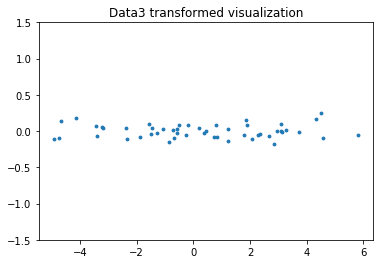

In [29]:
# 3d
print("part - 3d")
# Applying the transformation to data points
data3_trans = np.dot(data3,eigvecs)
# visualizing the data
plt.figure()
plt.scatter(data3_trans[:,0],data3_trans[:,1], s = 8)
plt.ylim((-1.5,1.5))
plt.title("Data3 transformed visualization")
plt.show()

**(3e) Find a one-dimensional representation of the data such that the representation loss is minimum.**

**(3f) Reverse the (rotation) transformation on the approximated data and visualize the data.**

part - 3e
The 1D representation is the first feature of transformed data matrix

part - 3f


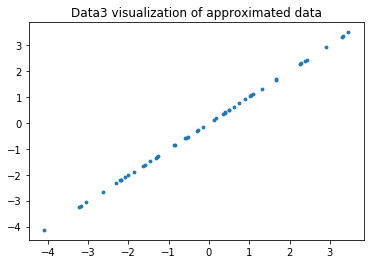

In [34]:
# 3e 
print("part - 3e")
# One dimensional representation of minimum loss
data3_trans_1D = data3_trans[:,0].reshape(-1,1)
print("The 1D representation is the first feature of transformed data matrix")
print()

# 3f
print("part - 3f")
# retransformed data
data3_orig = np.dot(data3_trans_1D,eigvecs[:,0].reshape(1,-1))

# visualizing the data
plt.figure()
plt.scatter(data3_orig[:,0],data3_orig[:,1], s = 8)
# plt.ylim((-1.5,1.5))
plt.title("Data3 visualization of approximated data")
plt.show()

**(3e) Compute the representational loss (with respect to the original data).**

**(3f) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [42]:
# 3e
# representational loss
m = data3.shape[1]
rep_loss = np.sum((data3-data3_orig)**2)
print("Representation Loss :",rep_loss)
print()
# np.mean((data3-data3_orig)**2)*m

# loss incurred without transformation
# single feature representation
loss = np.zeros(2)
loss[0] = (np.linalg.norm(data3[:,0]-np.mean(data3[:,0])))**2 # loss incurred if I remove feature 0
loss[1] = (np.linalg.norm(data3[:,1]-np.mean(data3[:,1])))**2 # loss incurred if I remove feature 1
min_loss = min(loss)
print("minimum loss after eliminating one feature, without transformation :",min_loss)

print("\nComment\n")
print("The loss incurred without transformation is huge when compared to ")

Representation Loss : 0.41202530567514994

minimum loss after eliminating one feature, without transformation : 176.11411905436034


**(4a) Load the data file 'data4.csv'.**

**(4b) Plot the representation loss as a function of the number of features (in the transformed domain) used for representation.**

In [45]:
# 4a
# loading data4.csv
data4 = pd.read_csv("data4.csv",header= None)
data4.head()

,0,1,2,3
0,0.886636,5.414102,5.414102,-0.050537
1,1.571465,-4.373945,-4.373945,-0.046006
2,0.344091,-13.850319,-13.850319,-0.008261
3,-1.904044,-0.465430,-0.465430,-0.104967
4,0.321489,-1.487056,-1.487056,0.009423


Covariance matrix ,C :
[[ 9.63091289e-01  4.14494945e-02  4.14494944e-02 -2.04024454e-03]
 [ 4.14494945e-02  4.12354462e+01  4.12354462e+01 -1.38832857e-02]
 [ 4.14494944e-02  4.12354462e+01  4.12354462e+01 -1.38832857e-02]
 [-2.04024454e-03 -1.38832857e-02 -1.38832857e-02  5.09034314e-03]]

The uncorrelated covariance matrix C :
[[ 8.24709393e+01 -1.53314861e-14  1.66706926e-15  0.00000000e+00]
 [-1.53299682e-14  9.63053418e-01  2.37657116e-16  7.31836466e-18]
 [ 1.66939797e-15  2.38336437e-16  5.08138259e-03 -9.18501352e-19]
 [-5.02429234e-15  7.08166991e-18  5.53386785e-19 -5.02429587e-15]]
decreasing order of importance of features : [3 2 1 4]

part - 4b



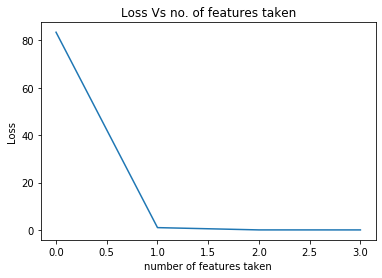

In [59]:
# 4b
data4 = np.array(data4)
cov_mat = np.cov(data4,rowvar= False)
print("Covariance matrix ,C :")
print(cov_mat)

# uncorrelating the covariance matrix
eigvals, eigvecs = np.linalg.eig(cov_mat)
# eigvals
# uncorrelated rotation of covariance matrix
idx = eigvals.argsort()[::-1]
# arranging in descending order
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
uncorr_cov_mat = np.dot(np.dot(eigvecs.T,cov_mat),eigvecs)
print("\nThe uncorrelated covariance matrix C :")
print(uncorr_cov_mat)

var_arr = [uncorr_cov_mat[i][i] for i in range(len(eigvals))]

# initializing loss
loss = [0]*(len(var_arr))
print("decreasing order of importance of features :",order+1)
for i in range(data4.shape[1]):
    loss[i] = sum(var_arr[i:])
# loss.reverse()

print("\npart - 4b\n")

# plot
plt.figure()
plt.plot(np.arange(data2.shape[1]),loss)
plt.xlabel("number of features taken")
plt.ylabel("Loss")
plt.title("Loss Vs no. of features taken")
plt.show()

# Application

**(5a) Load the human face data set given below.**

In [16]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

** faces.data should contain vectorized 1-D images. faces.images should contain 2-D images.**

**(5b) Visualize the data set.**

The images in the dataset are as follows :


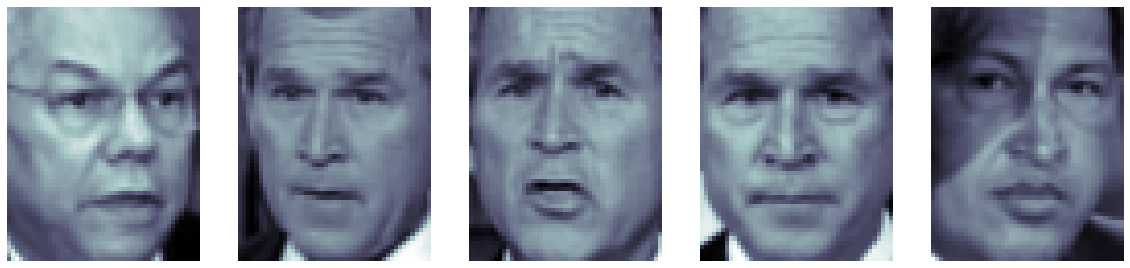

In [24]:
faces
# visualizing the data
print("The images in the dataset are as follows :")
# plotting
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(faces.images[i],cmap = plt.cm.bone)
    # plt.axis('off')
    # plt.title(str(Digits.target[i]))

**(5c) Take faces.data and apply PCA. **

In [46]:
Data = faces.data
from sklearn.decomposition import PCA
# Applying pca
pca = PCA(n_components= 150)
PCs = pca.fit_transform(Data)


0.9456976593646687

**(5c) Take the top 150 features from PCA. Reconstruct the images with the top 150 features and visualize it. Comment.**

The percentage of variance captured :  94.56976593646687


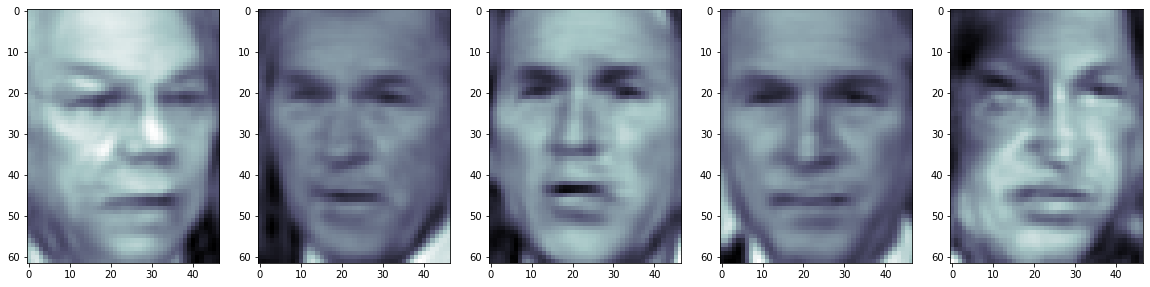

In [47]:
Images = pca.inverse_transform(PCs)
# plotting
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(Images[i].reshape(faces.images[0].shape),cmap = plt.cm.bone)

## explained variance ratio
print("The percentage of variance captured : ",sum(pca.explained_variance_ratio_)*100)

## comment
- The percentage of variance captured is 95 %, with just 150 features(transformed).
- we were able to reconstruct the images very well, just using 150 transformed features.
- From this we understand that PCA can be used as a dimensionality reduction tool.

**(5d) Consider any two classes (categories, e.g., humans) from the data set. Compare the performance of logistic regression with and without PCA. Comment on the classification accuracy. (Optional). **